In [6]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df=pd.read_csv('/Users/alishgiri/Desktop/jupyter-work/capstone/dataset_cat')

In [8]:
df=df.drop(columns='Unnamed: 0')


In [9]:
df.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6123.547647,LEO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


In [10]:
df.shape

(90, 18)

In [11]:
help(sns.catplot)

Help on function catplot in module seaborn.categorical:

catplot(data=None, *, x=None, y=None, hue=None, row=None, col=None, kind='strip', estimator='mean', errorbar=('ci', 95), n_boot=1000, seed=None, units=None, weights=None, order=None, hue_order=None, row_order=None, col_order=None, col_wrap=None, height=5, aspect=1, log_scale=None, native_scale=False, formatter=None, orient=None, color=None, palette=None, hue_norm=None, legend='auto', legend_out=True, sharex=True, sharey=True, margin_titles=False, facet_kws=None, ci=<deprecated>, **kwargs)
    Figure-level interface for drawing categorical plots onto a FacetGrid.

    This function provides access to several axes-level functions that
    show the relationship between a numerical and one or more categorical
    variables using one of several visual representations. The `kind`
    parameter selects the underlying axes-level function to use.

    Categorical scatterplots:

    - :func:`stripplot` (with `kind="strip"`; the default)
  

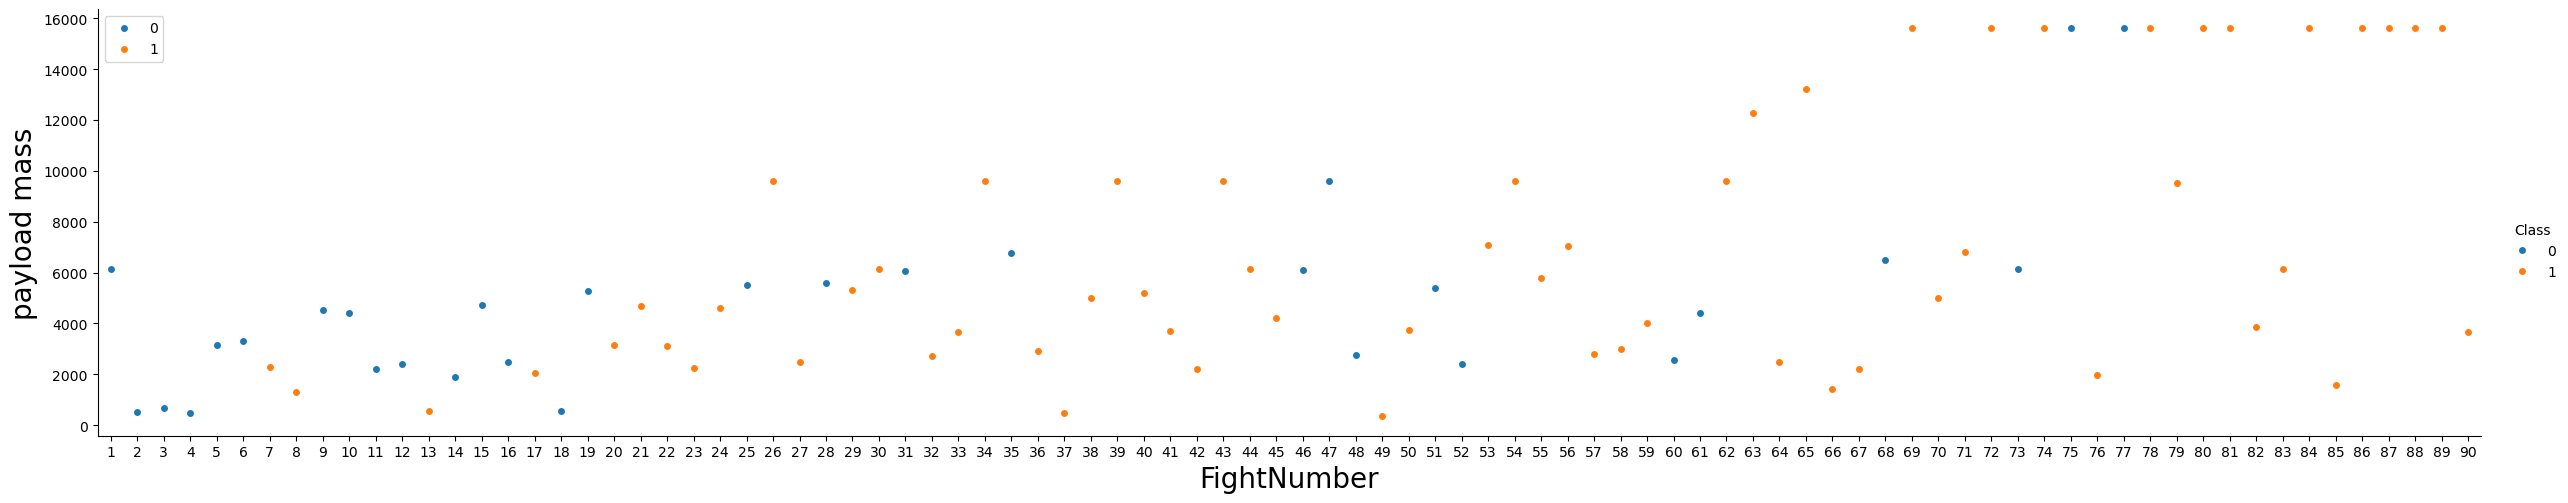

In [18]:
sns.catplot(data=df,y='PayloadMass',x='FlightNumber',hue='Class',aspect=5)
plt.xlabel('FightNumber',fontsize=20)
plt.ylabel('payload mass',fontsize=20)
plt.legend()
plt.show()

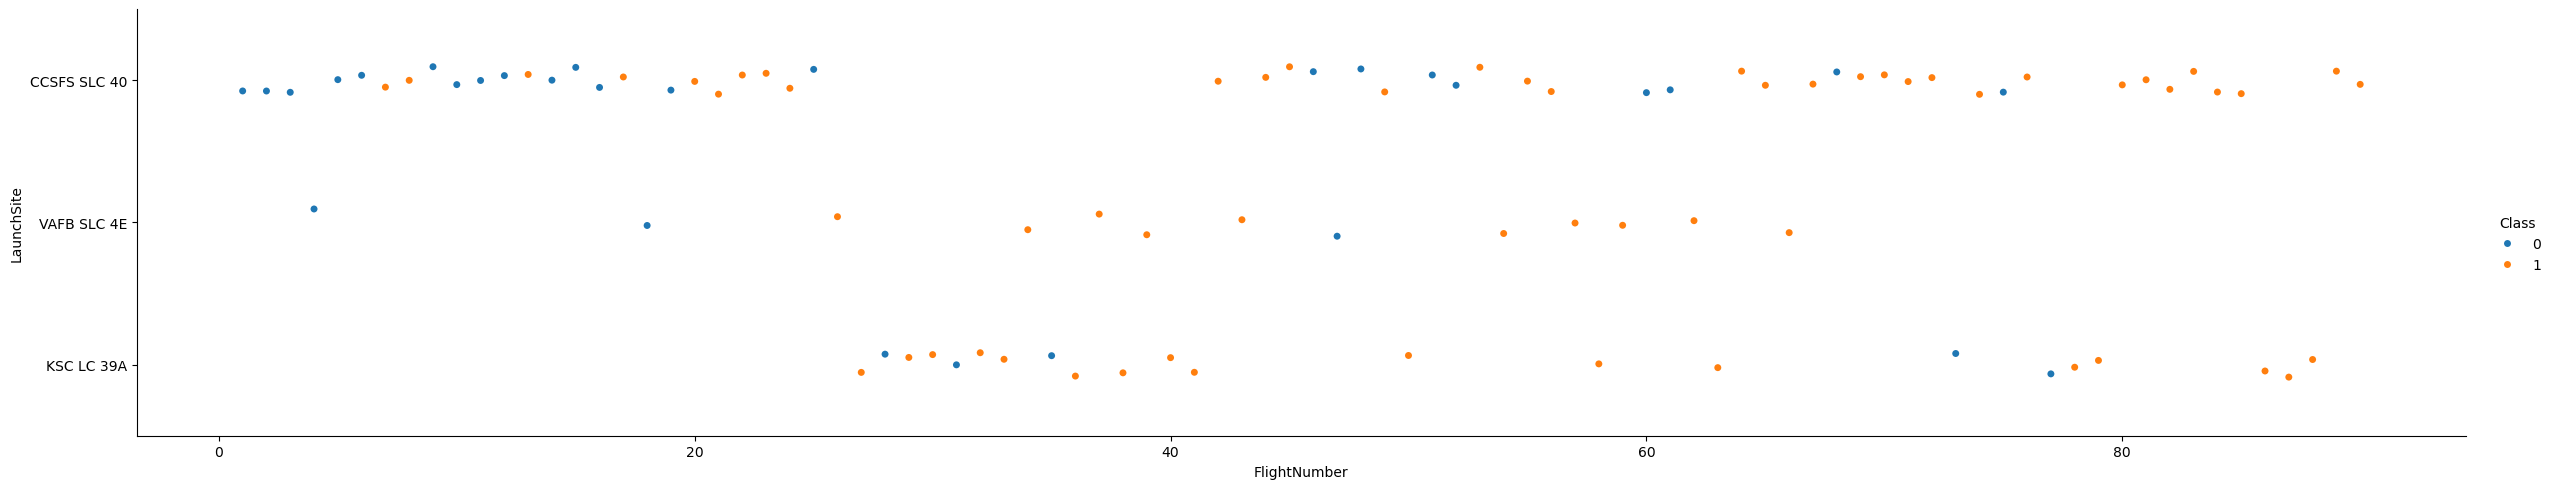

In [21]:
sns.catplot(data=df,x='FlightNumber',y='LaunchSite',hue='Class',aspect=5)


<Axes: xlabel='PayloadMass', ylabel='LaunchSite'>

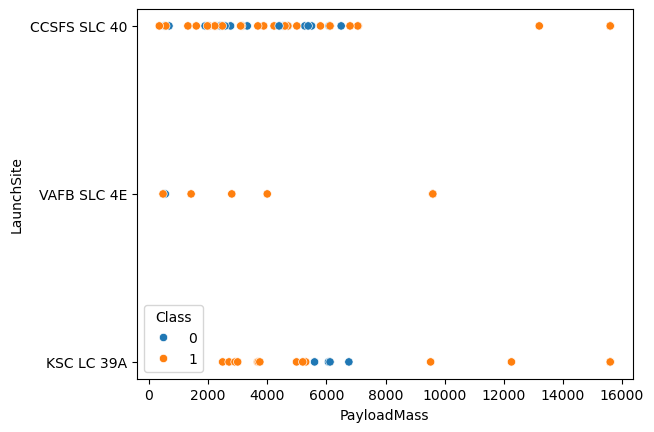

In [27]:
sns.scatterplot(data=df,x='PayloadMass',y='LaunchSite',hue='Class')

In [28]:
help(sns.barplot)

Help on function barplot in module seaborn.categorical:

barplot(data=None, *, x=None, y=None, hue=None, order=None, hue_order=None, estimator='mean', errorbar=('ci', 95), n_boot=1000, seed=None, units=None, weights=None, orient=None, color=None, palette=None, saturation=0.75, fill=True, hue_norm=None, width=0.8, dodge='auto', gap=0, log_scale=None, native_scale=False, formatter=None, legend='auto', capsize=0, err_kws=None, ci=<deprecated>, errcolor=<deprecated>, errwidth=<deprecated>, ax=None, **kwargs)
    Show point estimates and errors as rectangular bars.

    A bar plot represents an aggregate or statistical estimate for a numeric
    variable with the height of each rectangle and indicates the uncertainty
    around that estimate using an error bar. Bar plots include 0 in the
    axis range, and they are a good choice when 0 is a meaningful value
    for the variable to take.

    See the :ref:`tutorial <categorical_tutorial>` for more information.

    .. note::
        By defa

          Class
Orbit          
ES-L1  1.000000
GEO    1.000000
GTO    0.518519
HEO    1.000000
ISS    0.619048
LEO    0.714286
MEO    0.666667
PO     0.666667
SO     0.000000
SSO    1.000000
VLEO   0.857143


<Axes: xlabel='Orbit', ylabel='Class'>

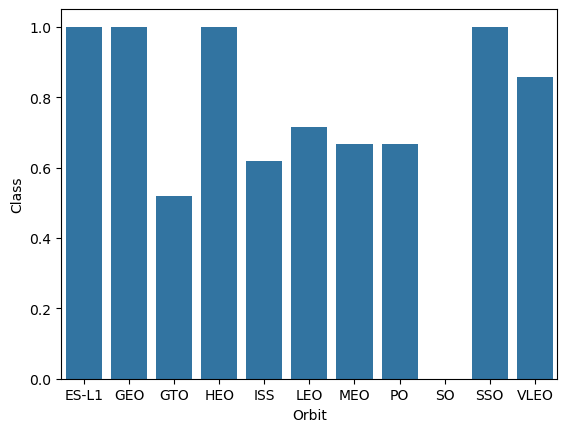

In [37]:
bar=df[['Orbit','Class']]
bar=bar.groupby('Orbit').mean()
print(bar)
sns.barplot(data=bar,x='Orbit',y='Class')

<Axes: xlabel='FlightNumber', ylabel='Orbit'>

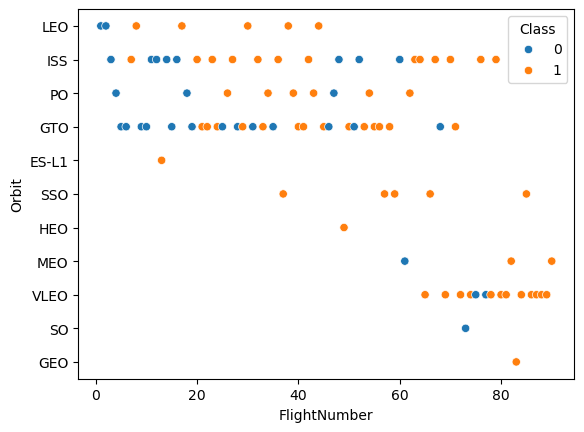

In [38]:
sns.scatterplot(data=df,x='FlightNumber',y='Orbit',hue='Class')

<Axes: xlabel='PayloadMass', ylabel='Orbit'>

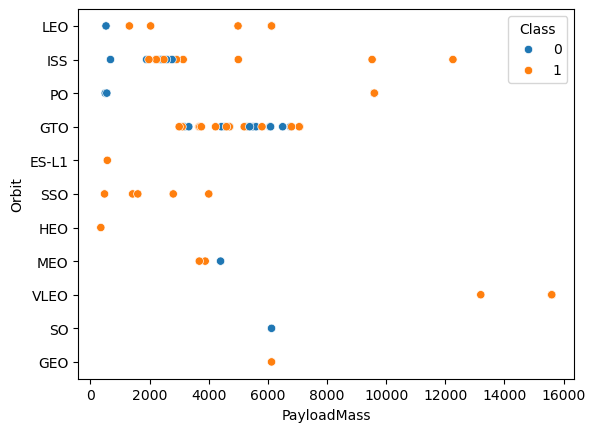

In [39]:
sns.scatterplot(data=df,x='PayloadMass',y='Orbit',hue='Class')

In [44]:
line=df[['Date','Class']]
line['Date']=pd.to_datetime(line['Date']).dt.year
line=line.groupby('Date').mean()
line

/var/folders/6y/797h3h7x2jvd0fcw33s3fw1r0000gn/T/ipykernel_99894/4125208977.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  line['Date']=pd.to_datetime(line['Date']).dt.year


,Class
Date,
2010,0.000000
2012,0.000000
2013,0.000000
2014,0.333333
2015,0.333333
2016,0.625000
2017,0.833333
2018,0.611111
2019,0.900000


<Axes: xlabel='Date', ylabel='Class'>

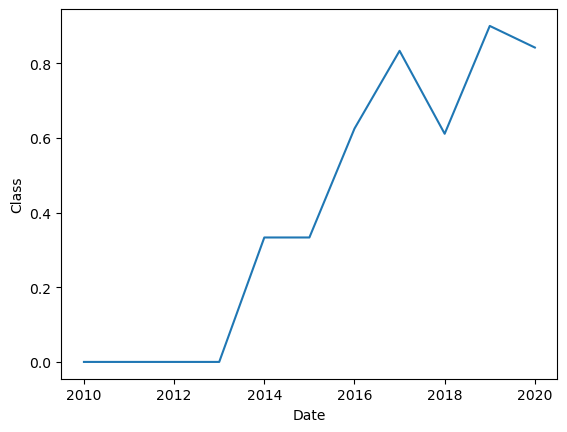

In [46]:
sns.lineplot(data=line,x='Date',y='Class')

In [47]:
features = df[['FlightNumber', 'PayloadMass', 'Orbit', 'LaunchSite', 'Flights', 'GridFins', 'Reused', 'Legs', 'LandingPad', 'Block', 'ReusedCount', 'Serial']]
features.head()

,FlightNumber,PayloadMass,Orbit,LaunchSite,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial
0,1,6123.547647,LEO,CCSFS SLC 40,1,False,False,False,NaN,1.0,0,B0003
1,2,525.000000,LEO,CCSFS SLC 40,1,False,False,False,NaN,1.0,0,B0005
2,3,677.000000,ISS,CCSFS SLC 40,1,False,False,False,NaN,1.0,0,B0007
3,4,500.000000,PO,VAFB SLC 4E,1,False,False,False,NaN,1.0,0,B1003
4,5,3170.000000,GTO,CCSFS SLC 40,1,False,False,False,NaN,1.0,0,B1004


In [50]:
features_one_hot=pd.get_dummies(features[['Orbit', 'LaunchSite', 'LandingPad','Serial']])

In [55]:
features_one_hot=features_one_hot.astype(float)

In [56]:
features_one_hot.head()

,Orbit_ES-L1,Orbit_GEO,Orbit_GTO,Orbit_HEO,Orbit_ISS,Orbit_LEO,Orbit_MEO,Orbit_PO,Orbit_SO,Orbit_SSO,...,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [57]:
features_one_hot.to_csv('features_one_hot')

In [58]:
features_one_hot.shape

(90, 72)